In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
import numpy as np
import re
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dfe = pd.read_csv('/content/drive/MyDrive/Bracu/Fall 2022/CSE 431/SarcasDetectionEDA.csv')
df = pd.read_csv('/content/drive/MyDrive/Bracu/Fall 2022/CSE 431/SarcasDetection.csv')
df.head()

,Unnamed: 0,Comments,Label
0,0,আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...,1.0
1,1,আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...,1.0
2,2,বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...,1.0
3,3,"হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ",1.0
4,4,থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5112 non-null   int64  
 1   Comments    5112 non-null   object 
 2   Label       5112 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 119.9+ KB


In [ ]:
df.describe()

,Unnamed: 0,Label
count,5112.000000,5112.000000
mean,2555.500000,0.382042
std,1475.851619,0.485934
min,0.000000,0.000000
25%,1277.750000,0.000000
50%,2555.500000,0.000000
75%,3833.250000,1.000000
max,5111.000000,1.000000


#PRE PROCESSING

In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    # english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)    
    text=emoji_pattern.sub(r'', text)
    # text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char
        else:
            no_punct = no_punct + " "
    return no_punct

def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
df['cleanText'] = df.Comments.apply(lambda x: preprocessing(str(x)))

In [ ]:
df.head()

,Unnamed: 0,Comments,Label,cleanText
0,0,আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...,1.0,আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...
1,1,আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...,1.0,আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...
2,2,বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...,1.0,বাহ আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...
3,3,"হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ",1.0,হাহ মজার বিষয় আনোয়েড গ্রুআপ
4,4,থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন,1.0,থান্ডার আমাকে এ জেগে উঠলে এটি ভালবাসুন


#BALANCING

In [ ]:
df['Label'].value_counts()

0.0    3159
1.0    1953
Name: Label, dtype: int64

In [ ]:
def dataset_balance(data):
    data_positive = data[(data['Label']== 1)]
    data_negative = data[(data['Label']==0)]
    data_positive_upsampled = resample(data_positive, replace = True, n_samples =  data['Label'].value_counts()[0], random_state = 42)
    balanced_dataset = pd.concat([data_positive_upsampled,data_negative]).reset_index(drop=True)
    return balanced_dataset

In [ ]:
df_train, df_test = train_test_split(df, train_size = 0.8, shuffle = True)

In [ ]:
df_train['Label'].value_counts()

0.0    2507
1.0    1582
Name: Label, dtype: int64

In [ ]:
df_train = dataset_balance(df_train)
df_train['Label'].value_counts()

1.0    2507
0.0    2507
Name: Label, dtype: int64

In [ ]:

tf_idf = TfidfVectorizer(ngram_range = (1,5))
tf_idf.fit(df['Comments'])
X_train = tf_idf.transform(df_train['cleanText'])
Y_train = df_train.Label
X_test = tf_idf.transform(df_test['cleanText'])
Y_test = df_test.Label

# TRAINING THE MACHINE LEARNING MODEL


1.   Logistic Regression
2.   Support Vector Machine
3.   Naive Bayes
4.   Random Forest
5.   Decision Tree



In [ ]:
model_LR = LogisticRegression().fit(X_train,Y_train)

In [ ]:
model_SVM = SVC(kernel='rbf', random_state = 42).fit(X_train, Y_train)

In [ ]:
model_NB = ComplementNB().fit(X_train,Y_train)

In [ ]:
model_RF = RandomForestClassifier(n_estimators= 250, criterion="entropy").fit(X_train, Y_train)

In [ ]:
model_DC = DecisionTreeClassifier(criterion = 'entropy', random_state = 1).fit(X_train,Y_train)

In [ ]:
LR_score = classification_report(Y_test, model_LR.predict(X_test))
print("LOGISTIC REGRESSION")
print(LR_score)

LOGISTIC REGRESSION
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       652
         1.0       0.88      0.80      0.84       371

    accuracy                           0.89      1023
   macro avg       0.89      0.87      0.88      1023
weighted avg       0.89      0.89      0.89      1023



In [ ]:
SVC_score = classification_report(Y_test, model_SVM.predict(X_test))
print("SUPPORT VECTOR CLASSIFICATION")
print(SVC_score)

SUPPORT VECTOR CLASSIFICATION
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       652
         1.0       0.95      0.69      0.80       371

    accuracy                           0.87      1023
   macro avg       0.90      0.83      0.85      1023
weighted avg       0.88      0.87      0.87      1023



In [ ]:
NB_score = classification_report(Y_test, model_NB.predict(X_test))
print("NAIVE BAYES CLASSIFICATION")
print(NB_score)

NAIVE BAYES CLASSIFICATION
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91       652
         1.0       0.80      0.93      0.86       371

    accuracy                           0.89      1023
   macro avg       0.88      0.90      0.88      1023
weighted avg       0.90      0.89      0.89      1023



In [ ]:
RF_score = classification_report(Y_test, model_RF.predict(X_test))
print("RANDOM FOREST CLASSIFICATION")
print(RF_score)

RANDOM FOREST CLASSIFICATION
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       652
         1.0       0.95      0.74      0.83       371

    accuracy                           0.89      1023
   macro avg       0.91      0.86      0.88      1023
weighted avg       0.90      0.89      0.89      1023



In [ ]:
DC_score = classification_report(Y_test, model_DC.predict(X_test))
print("DECISION TREE CLASSIFICATION")
print(DC_score)

DECISION TREE CLASSIFICATION
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       652
         1.0       0.77      0.78      0.77       371

    accuracy                           0.83      1023
   macro avg       0.82      0.82      0.82      1023
weighted avg       0.83      0.83      0.83      1023



In [ ]:
import numpy as np 
import pandas as pd 
import re
import string
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras_preprocessing.sequence import pad_sequences
from keras.layers import LSTM, GRU
from keras.layers import Dense, Activation, Dropout
from keras.layers import Embedding
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping

In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print("Tensorflow version " + tf.__version__)

# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# except ValueError:
#   raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
df.head()

,Unnamed: 0,Comments,Label,cleanText
0,0,আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...,1.0,আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...
1,1,আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...,1.0,আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...
2,2,বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...,1.0,বাহ আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...
3,3,"হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ",1.0,হাহ মজার বিষয় আনোয়েড গ্রুআপ
4,4,থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন,1.0,থান্ডার আমাকে এ জেগে উঠলে এটি ভালবাসুন


In [ ]:
df['Comments'].apply(lambda x:len(str(x).split())).max()

180

In [ ]:
Y = pd.get_dummies(df['Label']).values
print('Shape of label tensor:', Y.shape)
X = df['cleanText']

Shape of label tensor: (5112, 2)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8, random_state=42, shuffle = True)


In [ ]:
maxlen = 300
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)

X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
def create_embedding_matrix(filepath, word_idx, embedding_dim):
    vocab_size = len(word_idx) + 1  
    emb = np.zeros((vocab_size, embedding_dim))
    with open(filepath, 'r', encoding="utf8") as f:
        for i in f:
            x = i.split(' ')
            w, v = x[0], x[1:]
            if w in word_idx:
                emb[word_idx[w]] = np.asarray(v)[:embedding_dim]
    return emb

In [ ]:
embedding_dim = 300
# embedding_matrix = create_embedding_matrix('/content/drive/MyDrive/Bracu/Spring2022/CSE440/Project/Dataset/glove.840B.300d.txt', tokenizer.word_index, embedding_dim)
embedding_matrix = create_embedding_matrix('/content/drive/MyDrive/Bracu/Fall 2022/CSE 431/bn_glove.39M.300d.txt', tokenizer.word_index, embedding_dim)

In [ ]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import GlobalMaxPool1D, Input
from keras.models import Model

In [ ]:


from keras.layers import concatenate, Flatten
input = Input(shape=(300,))
cnn_input = layers.Embedding(vocab_size, embedding_dim, 
                          weights=[embedding_matrix], 
                          input_length=maxlen, 
                          trainable=True)(input)
cnn1 = Conv1D(128,8,activation = 'relu' )(cnn_input)
cnn2 = MaxPooling1D(2)(cnn1)
cnn3 = Dropout(0.3)(cnn2)
cnn4 = Conv1D(64,8,activation = 'relu' )(cnn3)
cnn5 = MaxPooling1D(2)(cnn4)
cnn6 = Dropout(0.3)(cnn5)
cnn7 = Dense(64, activation = 'relu')(cnn6)
cnn8 = Dropout(0.3)(cnn7)
cnn9 = Dense(32, activation = "relu")(cnn8)
cnn10 = Flatten()(cnn9)

gru_input = layers.Embedding(vocab_size, embedding_dim, 
                          weights=[embedding_matrix], 
                          input_length=maxlen, 
                          trainable=True)(input)
gru1 = Bidirectional(GRU(300,activation='tanh', dropout=0.2, recurrent_dropout=0.2)) (gru_input)
gru2 = Dense(300,activation = 'relu')(gru1)
dropout = Dropout(0.2)(gru2)
gru3 = Dense(32,activation = 'relu')(dropout)

merge = concatenate([cnn10,gru3])
output_layer = Dense(2, activation='softmax') (merge)

model_merged = Model(inputs =[input], outputs = [output_layer], name = "CNN_GRU_MODEL")
model_merged.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.BinaryAccuracy()])
model_merged.summary()


Model: "CNN_GRU_MODEL"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 300, 300)     3486600     ['input_3[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 293, 128)     307328      ['embedding_4[0][0]']            
                                                                                                  
 max_pooling1d_3 (MaxPooling1D)  (None, 146, 128)    0           ['conv1d_3[0][0]']               
                                                                                      

In [ ]:
epochs = 100
batch_size = 512 #*tpu_strategy.num_replicas_in_sync
for i in range(epochs):
  history = model_merged.fit(X_train, Y_train, epochs=1, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=2, min_delta=0.0001)])
  accr = model_merged.evaluate(X_test,Y_test) 
  print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Train on 3271 samples, validate on 818 samples
3271/3271 [==============================] - ETA: 0s - loss: 0.6681 - binary_accuracy: 0.6149

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3271/3271 [==============================] - 17s 5ms/sample - loss: 0.6681 - binary_accuracy: 0.6149 - val_loss: 0.5918 - val_binary_accuracy: 0.6858
Test set
  Loss: 0.605
  Accuracy: 0.660
Train on 3271 samples, validate on 818 samples
3271/3271 [==============================] - 14s 4ms/sample - loss: 0.5279 - binary_accuracy: 0.7438 - val_loss: 0.3694 - val_binary_accuracy: 0.8350
Test set
  Loss: 0.377
  Accuracy: 0.832
Train on 3271 samples, validate on 818 samples
3271/3271 [==============================] - 15s 5ms/sample - loss: 0.3141 - binary_accuracy: 0.8737 - val_loss: 0.2314 - val_binary_accuracy: 0.9120
Test set
  Loss: 0.236
  Accuracy: 0.922
Train on 3271 samples, validate on 818 samples
3271/3271 [==============================] - 14s 4ms/sample - loss: 0.1966 - binary_accuracy: 0.9288 - val_loss: 0.1663 - val_binary_accuracy: 0.9340
Test set
  Loss: 0.179
  Accuracy: 0.937
Train on 3271 samples, validate on 818 samples
3271/3271 [==============================] - 18s

KeyboardInterrupt: ignored

In [ ]:
accr = model_merged.evaluate(X_test,Y_test) 
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.170
  Accuracy: 0.960


In [ ]:
output = model_merged.predict(X_test)


/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
def flat(ndarray):
  array = []
  for x in ndarray:
    if x[0] > x[1]:
      array.append(0)
    else:
      array.append(1)
  return np.array(array)
  

In [ ]:
flatOutput = flat(output)
print(flatOutput)
flatY = flat(Y_test)

[0 0 1 ... 0 0 0]


In [ ]:
print(flatOutput.shape, flatY.shape)

(1023,) (1023,)


In [ ]:
print(classification_report(flatY, flatOutput))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       626
           1       0.95      0.94      0.95       397

    accuracy                           0.96      1023
   macro avg       0.96      0.96      0.96      1023
weighted avg       0.96      0.96      0.96      1023



In [ ]:
text = ['আমার হারানোর আগে আপনার ধৈর্য সন্ধান করুন।'] 
L = tokenizer.texts_to_sequences(text)
vocab_size = len(tokenizer.word_index) + 1   

L = pad_sequences(L, padding='post', maxlen=maxlen)

O = model_merged.predict(L)

flat(O)

array([1])

In [ ]:
df.Comments[45]
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

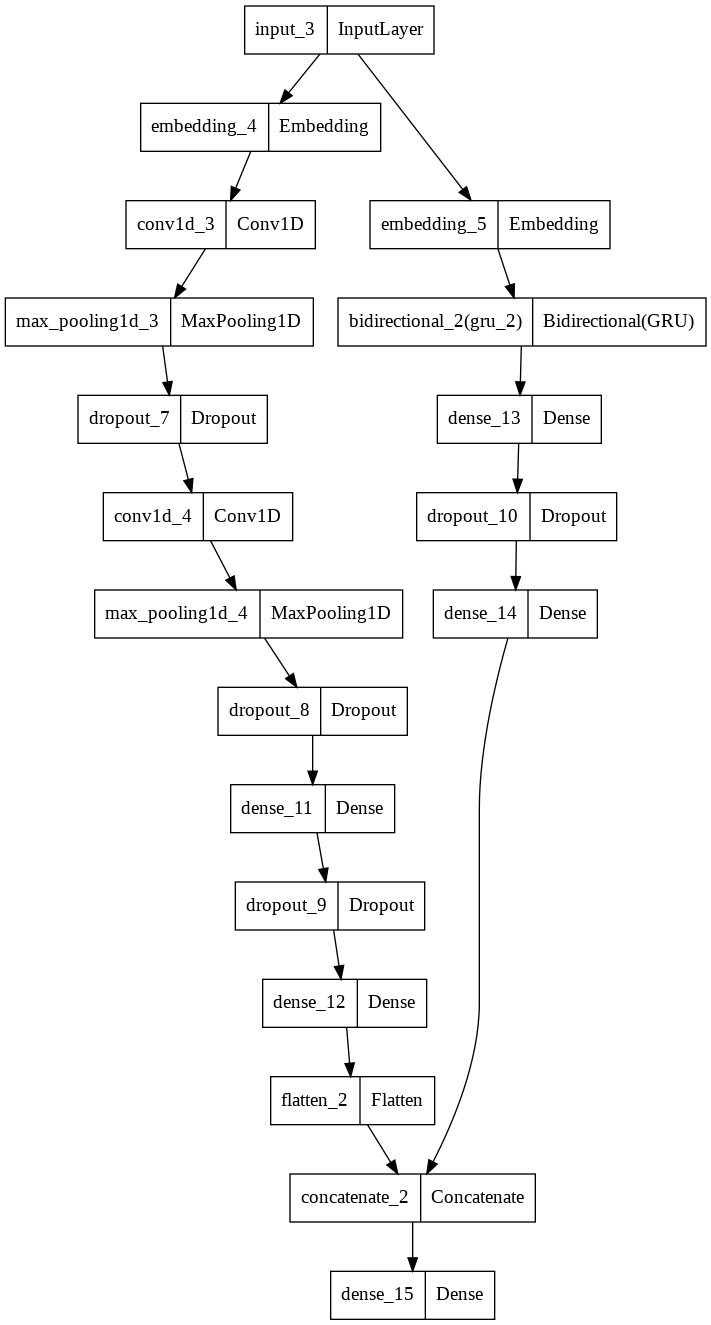

In [ ]:
import keras
keras.utils.plot_model(model_merged, "my_first_model.png")